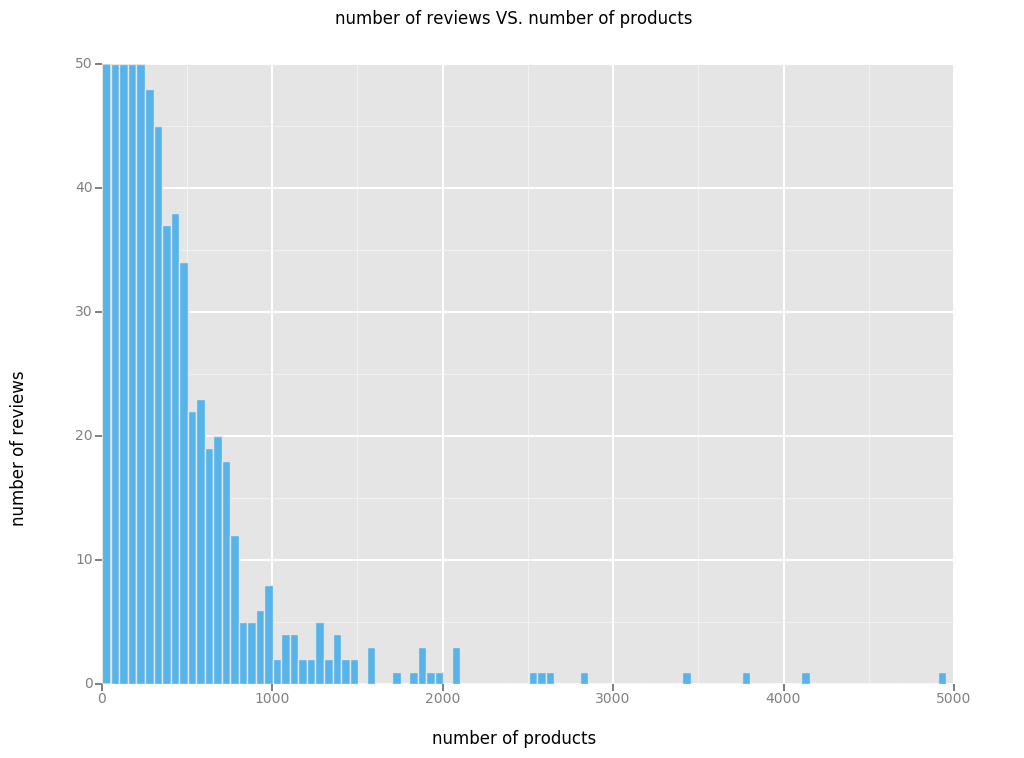

<ggplot: (303779949)>

In [21]:

from ggplot import *
import json
import matplotlib.pyplot as plt

amazon = sqlContext.read.json("Electronics_5.json")

amazonsum=amazon.groupBy("asin").agg({"overall": "mean", "summary": "count",})
amazonsum=amazonsum.orderBy("count(summary)",ascending=0)

#amazonsum.show()

#count the count
amazonsum_count=amazonsum.groupBy("count(summary)").count()

#to panda dataframe
amazonsum_count_panda = amazonsum_count.toPandas()



ggplot(aes(x='count(summary)',y='count'), data=amazonsum_count_panda) + \
    geom_histogram(binwidth=50, fill = '#56B4E9') + labs(title = "number of reviews VS. number of products") + \
    labs(x = 'number of products') + labs(y = 'number of reviews')



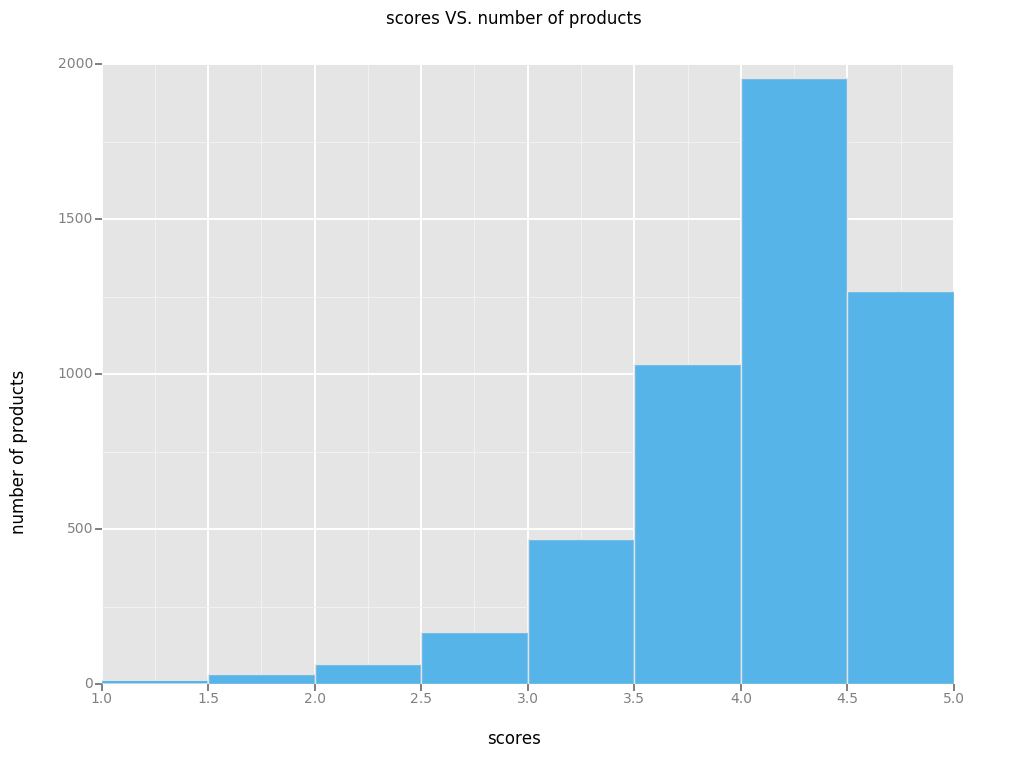

<ggplot: (293651485)>

In [7]:
from ggplot import *

#count the avg
amazonsum_avg=amazonsum.groupBy("avg(overall)").count()
amazonsum_avg_panda = amazonsum_avg.toPandas()

ggplot(aes(x='avg(overall)',y='count'), data=amazonsum_avg_panda) + \
    geom_histogram(binwidth=0.5, fill = '#56B4E9')+ labs(title = "scores VS. number of products") + \
    labs(x = 'scores') + labs(y = 'number of products')

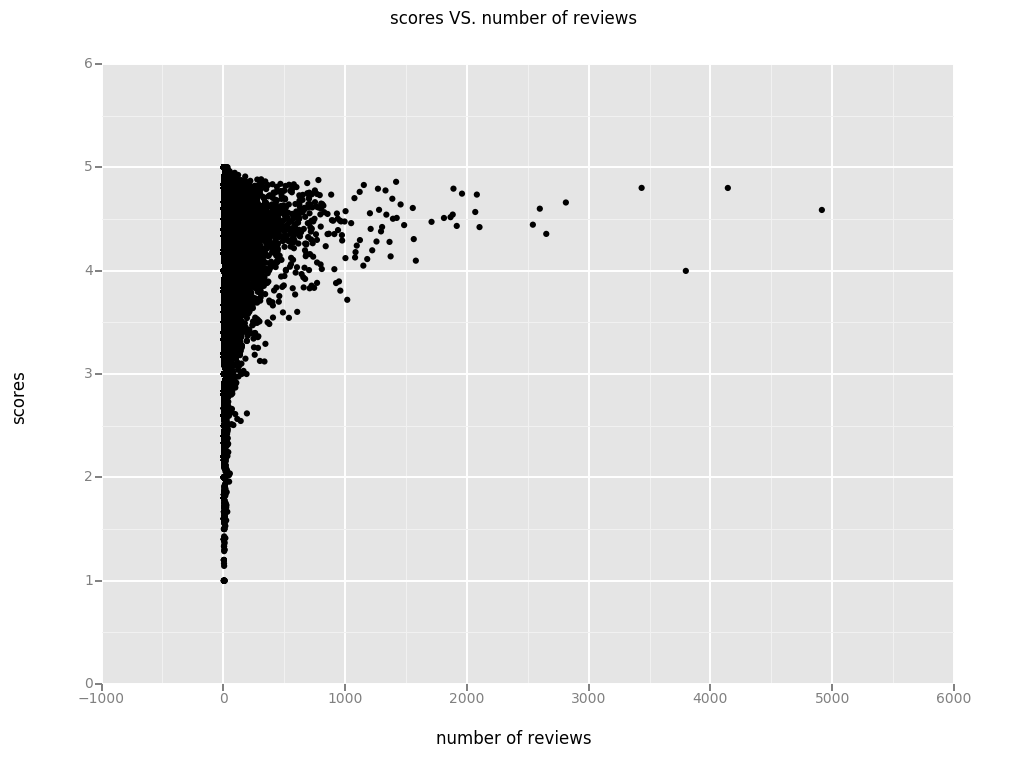

<ggplot: (292982373)>

In [8]:
amazonsum_panda = amazonsum.toPandas()

ggplot(aes(x='count(summary)',y='avg(overall)'), data=amazonsum_panda) + \
    geom_point() + labs(title = "scores VS. number of reviews") + \
    labs(x = 'number of reviews') + labs(y = 'scores')

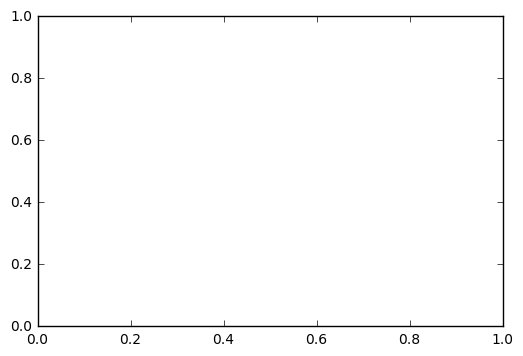

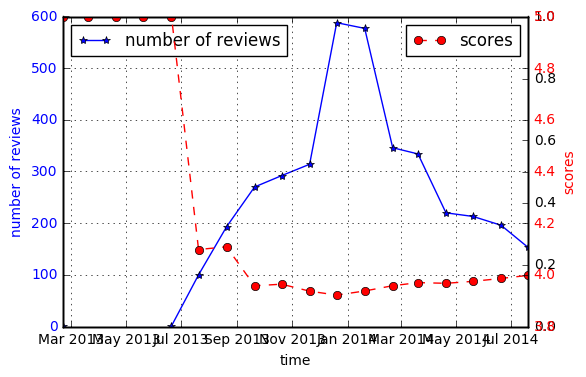

In [11]:


import json
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

amazon = sqlContext.read.json("Electronics_5.json")
amazon1=amazon.filter(amazon.asin=="B00DR0PDNE")


amazon1=amazon1.orderBy("unixReviewTime",ascending=0)


amazon1_panda = amazon1.toPandas()
amazon1_panda['datetime'] = pd.to_datetime(amazon1_panda["unixReviewTime"], unit='s')

amazon1_panda['month']=[str(x)[:7] for x in amazon1_panda['datetime']]


amazon1_panda_table = pd.pivot_table(amazon1_panda, values='overall', index='month', aggfunc=[np.mean,np.size])


rtime=pd.date_range(amazon1_panda['datetime'].min(),amazon1_panda['datetime'].max(),freq=pd.tseries.offsets.DateOffset(months=1))
rating_time=pd.DataFrame()
rating_time['time']=rtime
rating_time['month']=[str(x)[:7] for x in rating_time['time']]

#merge
amazon1_panda_table = rating_time.join(amazon1_panda_table,how='left', on = ['month'])

amazon1_panda_table.fillna(0)

amazon1_panda_table['m_sum']=amazon1_panda_table['size']*amazon1_panda_table['mean']
avg=list()
for x in range(len(amazon1_panda_table)):
    t=amazon1_panda_table[:(x+1)]['m_sum'].sum()
    c=amazon1_panda_table[:(x+1)]['size'].sum()
    avg.append(float(t)/c)

amazon1_panda_table['cum_avg'] = avg    
amazon1=amazon1_panda_table.reset_index()
#plot
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(amazon1['time'], amazon1['size'], 'b-',marker = '*', label = 'number of reviews')
ax1.set_xlabel('time')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('number of reviews', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
ax1.legend(loc=0)    
ax2 = ax1.twinx()

ax2.plot(amazon1.time, amazon1.cum_avg, 'r--', marker = 'o', label = 'scores')
ax2.set_ylabel('scores', color='r')
ax2.legend(loc=0)

ax1.grid()
for tl in ax2.get_yticklabels():
    tl.set_color('r')
    

plt.show()

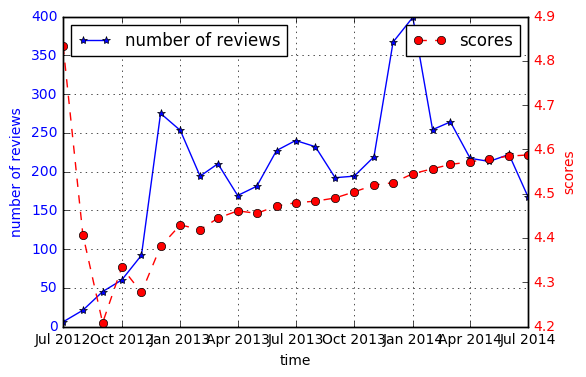

In [62]:
fig,ax1 = plt.subplots()
ax2 = ax.twinx()
ax1.plot(amazon1['time'], amazon1['size'], 'b-',marker = '*', label = 'number of reviews')
ax1.set_xlabel('time')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('number of reviews', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
ax1.legend(loc=0)    
ax2 = ax1.twinx()

ax2.plot(amazon1.time, amazon1.cum_avg, 'r--', marker = 'o', label = 'scores')
ax2.set_ylabel('scores', color='r')
ax2.legend(loc=0)

ax1.grid()
for tl in ax2.get_yticklabels():
    tl.set_color('r')
    

plt.show()


In [52]:
amazon = sqlContext.read.json("Electronics_5.json")

In [53]:
def grade_count_time(productID):
    from ggplot import *
    import json
    from datetime import datetime
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt

    amazon = sqlContext.read.json("Electronics_5.json")
    amazon1=amazon.filter(amazon.asin==productID)


    amazon1=amazon1.orderBy("unixReviewTime",ascending=0)


    amazon1_panda = amazon1.toPandas()
    amazon1_panda['datetime'] = pd.to_datetime(amazon1_panda["unixReviewTime"], unit='s')

    amazon1_panda['month']=[str(x)[:7] for x in amazon1_panda['datetime']]


    amazon1_panda_table = pd.pivot_table(amazon1_panda, values='overall', index='month', aggfunc=[np.mean,np.size])


    rtime=pd.date_range(amazon1_panda['datetime'].min(),amazon1_panda['datetime'].max(),freq='MS')
    rating_time=pd.DataFrame()
    rating_time['time']=rtime
    rating_time['month']=[str(x)[:7] for x in rating_time['time']]

    #merge
    amazon1_panda_table = rating_time.join(amazon1_panda_table,how='left', on = ['month'])

    amazon1_panda_table.fillna(0)

    amazon1_panda_table['m_sum']=amazon1_panda_table['size']*amazon1_panda_table['mean']
    avg=list()
    for x in range(len(amazon1_panda_table)):
        t=amazon1_panda_table[:(x+1)]['m_sum'].sum()
        c=amazon1_panda_table[:(x+1)]['size'].sum()
        avg.append(float(t)/c)

    amazon1_panda_table['cum_avg'] = avg    
    amazon1=amazon1_panda_table.reset_index()

    fig,ax = plt.subplots()
    ax2 = ax.twinx()


    amazon1[['time', 'size']].plot(x='time', linestyle='--', marker='*', ax = ax2)
    amazon1[['time', 'cum_avg']].plot(x='time', linestyle='-', marker='o', ax = ax)
    plt.show()

<ipython-input-53-a3b36e670a63>:1: SyntaxWarning: import * only allowed at module level
  def grade_count_time(productID):


In [58]:
from IPython.display import display
from IPython.html import widgets

# displaying the text widget
text = widgets.Text(description="ProductID", width=200)
display(text)
#button
button = widgets.Button(description="Search")
display(button)
def on_button_clicked(b):
    print(text.value)
    grade_count_time(text.value)
button.on_click(on_button_clicked)

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


SyntaxError: invalid syntax (<ipython-input-59-60d71f485637>, line 1)

In [20]:
amazon1['size'].tolist()


[6.0,
 21.0,
 45.0,
 60.0,
 92.0,
 275.0,
 253.0,
 194.0,
 210.0,
 169.0,
 181.0,
 227.0,
 240.0,
 232.0,
 192.0,
 194.0,
 219.0,
 367.0,
 399.0,
 254.0,
 264.0,
 217.0,
 213.0,
 222.0,
 167.0]

In [16]:
len(amazon1.cum_avg)

25

In [27]:
amazon1.size

175

In [11]:
amazonsum_count.show()

+--------------+-----+
|count(summary)|count|
+--------------+-----+
|          4915|    1|
|          4143|    1|
|          3798|    1|
|          3435|    1|
|          2813|    1|
|          2652|    1|
|          2599|    1|
|          2542|    1|
|          2104|    1|
|          2082|    1|
|          2069|    1|
|          1960|    1|
|          1917|    1|
|          1890|    1|
|          1884|    1|
|          1866|    1|
|          1812|    1|
|          1710|    1|
|          1581|    1|
|          1564|    1|
+--------------+-----+
only showing top 20 rows



In [8]:
amazon1_panda

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,datetime,month
0,B00DR0PDNE,"[0, 0]",4.0,"Absolutely amazing product. Easy to set up, an...","07 22, 2014",A3AL5OKJ6MQJIY,T Bruce,Stop watching Netflix on your computer!,1405987200,2014-07-22,2014-07
1,B00DR0PDNE,"[0, 0]",1.0,I spent an entire afternoon on the phone with ...,"07 21, 2014",ARYLS99FST9SY,Bob in Tampa,After what seemed like an eternity,1405900800,2014-07-21,2014-07
2,B00DR0PDNE,"[0, 0]",5.0,"Wow, I still cant believe what all this Tiny 3...","07 21, 2014",ADSCX0LUXC31L,Praveen,The Caster =======> Love It,1405900800,2014-07-21,2014-07
3,B00DR0PDNE,"[0, 0]",5.0,This beautiful device has revolutionized our e...,"07 21, 2014",A16A81C3ELWURB,"ssteussy ""steussys""","A Cheap, Reliable Way to Bring Your TV Up to Date",1405900800,2014-07-21,2014-07
4,B00DR0PDNE,"[0, 0]",5.0,"Works great, easy setup. Easy navigation and c...","07 20, 2014",A2T7NAM64SFFTA,None,"Works great, easy setup",1405814400,2014-07-20,2014-07
5,B00DR0PDNE,"[0, 0]",5.0,Installation was very easy. We tested streamin...,"07 20, 2014",A6MR59F31RHE4,SunYehoshua,Satisfied!,1405814400,2014-07-20,2014-07
6,B00DR0PDNE,"[0, 1]",2.0,COULD NOT GET MINE TO WORK TO FAR AWAY,"07 19, 2014",AIELWIAU50HWW,None,Two Stars,1405728000,2014-07-19,2014-07
7,B00DR0PDNE,"[0, 0]",5.0,"I wanted a way to watch Youtube, Netflix, Hulu...","07 19, 2014",A10IR9KS83532E,=DA=,"Low Cost, Small Footprint, Easy to Use",1405728000,2014-07-19,2014-07
8,B00DR0PDNE,"[0, 0]",5.0,Works great for watching Youtube videos on my ...,"07 19, 2014",A2KZOIOFXXMC1H,"The Penguin ""Techno Geek""",Works great with Youtube,1405728000,2014-07-19,2014-07
9,B00DR0PDNE,"[0, 0]",5.0,This simple device is great for streaming movi...,"07 18, 2014",AFBUDZ63FOLVS,Nancy Famolari,This simple device is great for streaming movi...,1405641600,2014-07-18,2014-07


In [5]:
freq=pd.tseries.offsets.DateOffset(months=1)

DatetimeIndex(['2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01', '2013-09-01', '2013-10-01',
               '2013-11-01', '2013-12-01', '2014-01-01', '2014-02-01',
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01'],
              dtype='datetime64[ns]', freq='MS')

In [9]:
rtime=pd.date_range(amazon1_panda['datetime'].min(),amazon1_panda['datetime'].max(),freq=pd.tseries.offsets.DateOffset(months=1))



In [10]:
rtime

DatetimeIndex(['2013-02-20', '2013-03-20', '2013-04-20', '2013-05-20',
               '2013-06-20', '2013-07-20', '2013-08-20', '2013-09-20',
               '2013-10-20', '2013-11-20', '2013-12-20', '2014-01-20',
               '2014-02-20', '2014-03-20', '2014-04-20', '2014-05-20',
               '2014-06-20', '2014-07-20'],
              dtype='datetime64[ns]', freq='<DateOffset: kwds={'months': 1}>')

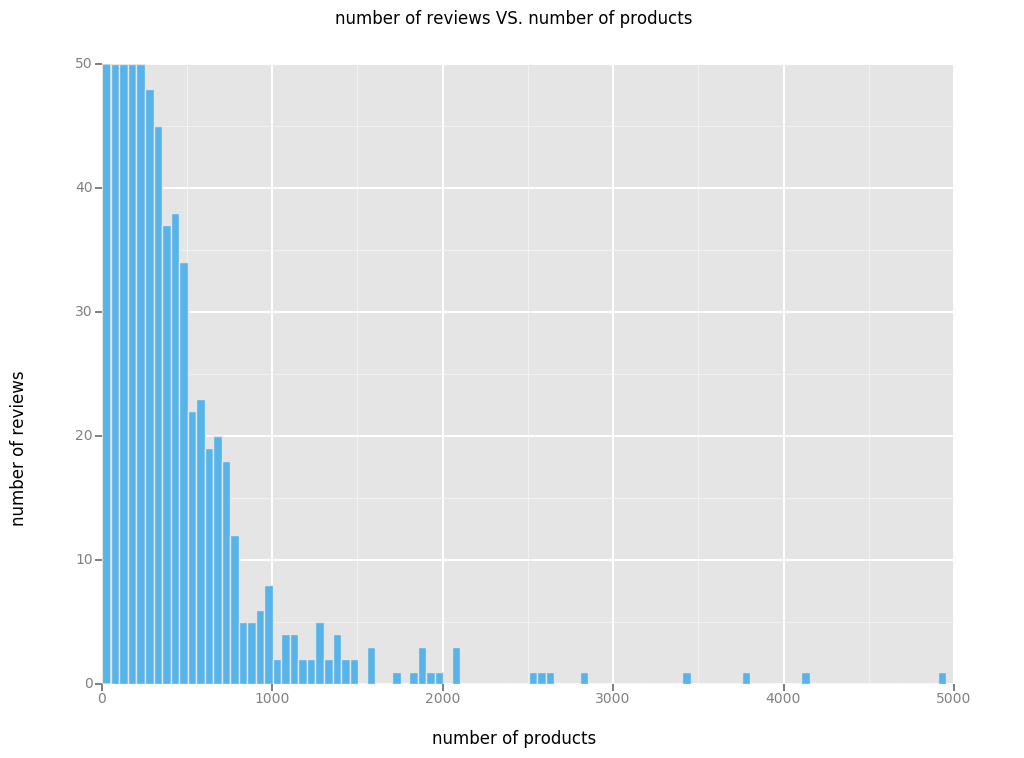

<ggplot: (297533945)>

In [20]:
p1